In [121]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [122]:
################## IMPORT ALL GOOGLE TRENDS DATA ########################
prevent_flu = pd.read_csv('terms/prevent_flu.csv')
flu_2019 = pd.read_csv('terms/flu19.csv')
common_cold = pd.read_csv('terms/common_cold.csv')
oseltamivir = pd.read_csv('terms/oseltamivir.csv')
cough = pd.read_csv('terms/cough.csv')
gripe = pd.read_csv('terms/gripe.csv')
influenza = pd.read_csv('terms/influenza.csv')
vaccine = pd.read_csv('terms/vaccine.csv')
flu_symptoms = pd.read_csv('terms/flu_symptoms.csv')

################## IMPORT CDC DATA ##########################
# data_cdc = pd.read_csv('CDCDat/Clinical_Labs.csv')
data = pd.read_csv('allvariables2.csv')

################ RENAME COLUMNS IN DATA ##########################
flu_2019=flu_2019.rename(columns={'flu: (United States)':'pop searches'})
common_cold = common_cold.rename(columns={'Common cold: (United States)':'pop searches'})
oseltamivir = oseltamivir.rename(columns={'Oseltamivir: (United States)':'pop searches'})
prevent_flu = prevent_flu.rename(columns={'prevent flu: (United States)':'pop searches'})
cough = cough.rename(columns={'cough: (United States)':'pop searches'})
gripe = gripe.rename(columns={'gripe: (United States)':'pop searches'})
influenza = influenza.rename(columns={'influenza: (United States)':'pop searches'})
vaccine = vaccine.rename(columns={'vaccine: (United States)':'pop searches'})
flu_symptoms = flu_symptoms.rename(columns={'flu_symptoms: (United States)':'pop searches'})

In [123]:
import math
sines = pd.Series()
cos = pd.Series()
for i in range(len(data)):
    sines=sines.append(pd.Series(math.sin(i*0.04)*40))
    cos = cos.append(pd.Series(math.cos(i*0.04)*40))
len(sines)

809

In [124]:
tots = pd.Series(data['TOTAL A']+data['TOTAL B'],name='total cases')
data['FLU']=data['FLU'].replace('<1',0)

# data['CC']=data['CC'].replace('<1',0)
# data['FLU_SYMP']=data['FLU_SYMP'].replace('<1',0)
# data['GRIPE']=data['GRIPE'].replace('<1',0)
# data['INF_SYMP']=data['INF_SYMP'].replace('<1',0)
# data['INFL']=data['INFL'].replace('<1',0)
# data['OSELT']=data['OSELT'].replace('<1',0)
# data['PREV']=data['PREV'].replace('<1',0)
# data['VACC']=data['VACC'].replace('<1',0)

for column in data:
    data[column] = data[column].replace('<1',0)
    data[column]=data[column].astype(float)

data['SUM'] = data['CC']+data['COUGH']+data['FLU_SYMP']+data['FLU']+data['GRIPE']+data['INF_SYMP']+data['INFL']+data['OSELT']+data['PREV']+data['VACC']
data['AVG'] = data['SUM']/10

df = pd.Series()
for i in range(len(data)):
    if data['WEEK'].iloc[i]<=16:
        df=df.append(pd.Series(True))
    elif data['WEEK'].iloc[i]>=40:
        df=df.append(pd.Series(True))
    else:
        df=df.append(pd.Series(False))

df.reset_index(drop=True,inplace=True)
data['SZN']=df
data['SZN'] = data['SZN'].replace(True,1)
data['SZN'] = data['SZN'].replace(False,0)
data

,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG,SZN
0,14.0,2004.0,1.0,6936.0,12.427900,853.0,9.0,76.0,65.0,55.0,21.0,25.0,80.0,28.0,5.0,0.0,3.0,358.0,35.8,1.0
1,15.0,2004.0,2.0,5411.0,9.332840,500.0,5.0,69.0,56.0,39.0,16.0,19.0,71.0,19.0,4.0,0.0,2.0,295.0,29.5,1.0
2,16.0,2004.0,3.0,4329.0,6.006010,257.0,3.0,63.0,55.0,31.0,14.0,31.0,30.0,15.0,3.0,0.0,3.0,245.0,24.5,1.0
3,17.0,2004.0,4.0,4166.0,3.984640,163.0,3.0,59.0,49.0,28.0,16.0,15.0,35.0,16.0,6.0,33.0,1.0,258.0,25.8,1.0
4,18.0,2004.0,5.0,3661.0,2.922700,105.0,2.0,50.0,49.0,20.0,16.0,15.0,26.0,16.0,5.0,0.0,1.0,198.0,19.8,1.0
5,19.0,2004.0,6.0,3530.0,1.841360,60.0,5.0,56.0,50.0,26.0,17.0,30.0,34.0,15.0,2.0,100.0,1.0,331.0,33.1,1.0
6,20.0,2004.0,7.0,3136.0,1.785710,48.0,8.0,45.0,49.0,21.0,14.0,35.0,17.0,13.0,2.0,66.0,1.0,263.0,26.3,1.0
7,21.0,2004.0,8.0,2559.0,1.484960,26.0,12.0,51.0,50.0,17.0,12.0,31.0,22.0,14.0,2.0,31.0,1.0,231.0,23.1,1.0
8,22.0,2004.0,9.0,2651.0,0.678989,10.0,8.0,43.0,48.0,10.0,9.0,12.0,56.0,11.0,1.0,0.0,1.0,191.0,19.1,1.0
9,23.0,2004.0,10.0,2369.0,0.590967,8.0,6.0,44.0,41.0,11.0,6.0,24.0,0.0,9.0,2.0,0.0,1.0,138.0,13.8,1.0


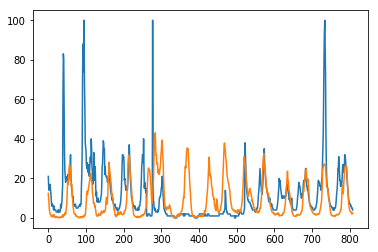

In [125]:
plt.plot(np.arange(0,809),data['FLU'])
plt.plot(np.arange(0,809),data['PERCENT POSITIVE'])

In [126]:
data['index']=data['index']-14
data.head()

,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG,SZN
0,0.0,2004.0,1.0,6936.0,12.42790,853.0,9.0,76.0,65.0,55.0,21.0,25.0,80.0,28.0,5.0,0.0,3.0,358.0,35.8,1.0
1,1.0,2004.0,2.0,5411.0,9.33284,500.0,5.0,69.0,56.0,39.0,16.0,19.0,71.0,19.0,4.0,0.0,2.0,295.0,29.5,1.0
2,2.0,2004.0,3.0,4329.0,6.00601,257.0,3.0,63.0,55.0,31.0,14.0,31.0,30.0,15.0,3.0,0.0,3.0,245.0,24.5,1.0
3,3.0,2004.0,4.0,4166.0,3.98464,163.0,3.0,59.0,49.0,28.0,16.0,15.0,35.0,16.0,6.0,33.0,1.0,258.0,25.8,1.0
4,4.0,2004.0,5.0,3661.0,2.92270,105.0,2.0,50.0,49.0,20.0,16.0,15.0,26.0,16.0,5.0,0.0,1.0,198.0,19.8,1.0


In [127]:
cos.reset_index(drop=True,inplace=True)
data=pd.concat([data,cos],axis=1)
data=data.rename(columns={0:"cos"})


sines.reset_index(drop=True,inplace=True)
data=pd.concat([data,sines],axis=1)
data=data.rename(columns={0:"sines"})

data=data.drop(['index'],axis=1)
data.head()

,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,FLU,...,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG,SZN,cos,sines
0,2004.0,1.0,6936.0,12.42790,853.0,9.0,76.0,65.0,55.0,21.0,...,80.0,28.0,5.0,0.0,3.0,358.0,35.8,1.0,40.000000,0.000000
1,2004.0,2.0,5411.0,9.33284,500.0,5.0,69.0,56.0,39.0,16.0,...,71.0,19.0,4.0,0.0,2.0,295.0,29.5,1.0,39.968004,1.599573
2,2004.0,3.0,4329.0,6.00601,257.0,3.0,63.0,55.0,31.0,14.0,...,30.0,15.0,3.0,0.0,3.0,245.0,24.5,1.0,39.872068,3.196588
3,2004.0,4.0,4166.0,3.98464,163.0,3.0,59.0,49.0,28.0,16.0,...,35.0,16.0,6.0,33.0,1.0,258.0,25.8,1.0,39.712345,4.788488
4,2004.0,5.0,3661.0,2.92270,105.0,2.0,50.0,49.0,20.0,16.0,...,26.0,16.0,5.0,0.0,1.0,198.0,19.8,1.0,39.489091,6.372728


In [128]:
# temp = data['CC'].iloc[4:]
# temp

In [129]:
# temp.reset_index(drop=True,inplace=True)
# temp = temp.append(pd.Series(np.nan))

In [130]:
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp.reset_index(drop=True,inplace=True)
# temp

In [131]:
#data = pd.concat([data,temp],axis=1)


In [132]:
# data = data.rename(columns={0:'CC shift'})

In [133]:
# temp = data['COUGH'].iloc[4:]
# temp.reset_index(drop=True,inplace=True)
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp.reset_index(drop=True,inplace=True)
# data = pd.concat([data,temp],axis=1)
# data = data.rename(columns={0:'COUGH shift'})
# data

In [134]:
# data = data.iloc[:801]
# data

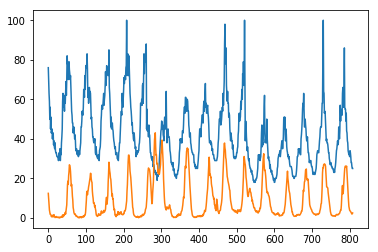

In [135]:
plt.plot(np.arange(0,809),data['CC'])
plt.plot(np.arange(0,809),data['PERCENT POSITIVE'])

In [136]:
data.head()

,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,FLU,...,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG,SZN,cos,sines
0,2004.0,1.0,6936.0,12.42790,853.0,9.0,76.0,65.0,55.0,21.0,...,80.0,28.0,5.0,0.0,3.0,358.0,35.8,1.0,40.000000,0.000000
1,2004.0,2.0,5411.0,9.33284,500.0,5.0,69.0,56.0,39.0,16.0,...,71.0,19.0,4.0,0.0,2.0,295.0,29.5,1.0,39.968004,1.599573
2,2004.0,3.0,4329.0,6.00601,257.0,3.0,63.0,55.0,31.0,14.0,...,30.0,15.0,3.0,0.0,3.0,245.0,24.5,1.0,39.872068,3.196588
3,2004.0,4.0,4166.0,3.98464,163.0,3.0,59.0,49.0,28.0,16.0,...,35.0,16.0,6.0,33.0,1.0,258.0,25.8,1.0,39.712345,4.788488
4,2004.0,5.0,3661.0,2.92270,105.0,2.0,50.0,49.0,20.0,16.0,...,26.0,16.0,5.0,0.0,1.0,198.0,19.8,1.0,39.489091,6.372728


In [163]:
temp1 = data[['YEAR','WEEK','TOTAL SPECIMENS','PERCENT POSITIVE','TOTAL A','TOTAL B','SZN']]
temp2 = data[['CC','COUGH','FLU_SYMP','FLU','GRIPE','INF_SYMP','INFL','OSELT','PREV','VACC','SUM','AVG']]
temp2 = temp2[14:]
temp1 = temp1[:795]
print(len(temp2))
print(len(temp1))

795
795


In [164]:
shifted = pd.concat([temp1,temp2],axis=1)
shifted.head()

,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,SZN,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG
0,2004.0,1.0,6936.0,12.42790,853.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004.0,2.0,5411.0,9.33284,500.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004.0,3.0,4329.0,6.00601,257.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004.0,4.0,4166.0,3.98464,163.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004.0,5.0,3661.0,2.92270,105.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
shifted = shifted[14:795]
shifted

,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,SZN,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG
14,2004.0,15.0,1564.0,0.959079,3.0,12.0,1.0,37.0,47.0,8.0,4.0,27.0,36.0,8.0,0.0,0.0,0.0,167.0,16.7
15,2004.0,16.0,1449.0,1.656310,13.0,11.0,1.0,39.0,46.0,16.0,6.0,14.0,16.0,8.0,1.0,0.0,1.0,147.0,14.7
16,2004.0,17.0,1377.0,0.798838,4.0,7.0,0.0,36.0,46.0,11.0,5.0,16.0,24.0,7.0,1.0,0.0,1.0,147.0,14.7
17,2004.0,18.0,1298.0,0.693374,3.0,6.0,0.0,35.0,44.0,7.0,4.0,27.0,16.0,5.0,1.0,0.0,1.0,140.0,14.0
18,2004.0,19.0,1241.0,0.161160,0.0,2.0,0.0,38.0,48.0,7.0,4.0,23.0,16.0,6.0,1.0,31.0,1.0,175.0,17.5
19,2004.0,20.0,1105.0,0.361991,1.0,3.0,0.0,34.0,43.0,8.0,4.0,30.0,0.0,7.0,1.0,0.0,1.0,128.0,12.8
20,2004.0,21.0,1055.0,0.568720,3.0,3.0,0.0,33.0,43.0,7.0,4.0,24.0,27.0,6.0,1.0,0.0,1.0,146.0,14.6
21,2004.0,22.0,823.0,0.729040,2.0,4.0,0.0,33.0,50.0,12.0,3.0,23.0,17.0,5.0,0.0,0.0,1.0,144.0,14.4
22,2004.0,23.0,793.0,0.378310,1.0,2.0,0.0,32.0,51.0,10.0,3.0,22.0,0.0,6.0,1.0,0.0,0.0,125.0,12.5
23,2004.0,24.0,844.0,0.236967,0.0,2.0,0.0,31.0,43.0,7.0,3.0,22.0,0.0,4.0,1.0,0.0,1.0,112.0,11.2


In [166]:
# # data = data[data['YEAR']!=2009]
# plt.plot(np.arange(0,749),data['CC shift'])
# plt.plot(np.arange(0,749),data['PERCENT POSITIVE'])

In [167]:
data.head()

,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,FLU,...,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG,SZN,cos,sines
0,2004.0,1.0,6936.0,12.42790,853.0,9.0,76.0,65.0,55.0,21.0,...,80.0,28.0,5.0,0.0,3.0,358.0,35.8,1.0,40.000000,0.000000
1,2004.0,2.0,5411.0,9.33284,500.0,5.0,69.0,56.0,39.0,16.0,...,71.0,19.0,4.0,0.0,2.0,295.0,29.5,1.0,39.968004,1.599573
2,2004.0,3.0,4329.0,6.00601,257.0,3.0,63.0,55.0,31.0,14.0,...,30.0,15.0,3.0,0.0,3.0,245.0,24.5,1.0,39.872068,3.196588
3,2004.0,4.0,4166.0,3.98464,163.0,3.0,59.0,49.0,28.0,16.0,...,35.0,16.0,6.0,33.0,1.0,258.0,25.8,1.0,39.712345,4.788488
4,2004.0,5.0,3661.0,2.92270,105.0,2.0,50.0,49.0,20.0,16.0,...,26.0,16.0,5.0,0.0,1.0,198.0,19.8,1.0,39.489091,6.372728


In [168]:
# temp = data['FLU_SYMP'].iloc[4:]
# temp.reset_index(drop=True,inplace=True)
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
#temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp.reset_index(drop=True,inplace=True)
# data = pd.concat([data,temp],axis=1)
# data = data.rename(columns={0:'FLU_SYMP shift'})

# temp = data['FLU'].iloc[4:]
# temp.reset_index(drop=True,inplace=True)
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp.reset_index(drop=True,inplace=True)
# data = pd.concat([data,temp],axis=1)
# data = data.rename(columns={0:'FLU shift'})

# temp = data['GRIPE'].iloc[4:]
# temp.reset_index(drop=True,inplace=True)
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp.reset_index(drop=True,inplace=True)
# data = pd.concat([data,temp],axis=1)
# data = data.rename(columns={0:'GRIPE shift'})

# temp = data['INF_SYMP'].iloc[4:]
# temp.reset_index(drop=True,inplace=True)
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp = temp.append(pd.Series(np.nan))
# temp.reset_index(drop=True,inplace=True)
# data = pd.concat([data,temp],axis=1)
# data = data.rename(columns={0:'INF_SYMP shift'})

In [169]:
# data=data[:797]
# data

In [170]:
shifted

,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,SZN,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG
14,2004.0,15.0,1564.0,0.959079,3.0,12.0,1.0,37.0,47.0,8.0,4.0,27.0,36.0,8.0,0.0,0.0,0.0,167.0,16.7
15,2004.0,16.0,1449.0,1.656310,13.0,11.0,1.0,39.0,46.0,16.0,6.0,14.0,16.0,8.0,1.0,0.0,1.0,147.0,14.7
16,2004.0,17.0,1377.0,0.798838,4.0,7.0,0.0,36.0,46.0,11.0,5.0,16.0,24.0,7.0,1.0,0.0,1.0,147.0,14.7
17,2004.0,18.0,1298.0,0.693374,3.0,6.0,0.0,35.0,44.0,7.0,4.0,27.0,16.0,5.0,1.0,0.0,1.0,140.0,14.0
18,2004.0,19.0,1241.0,0.161160,0.0,2.0,0.0,38.0,48.0,7.0,4.0,23.0,16.0,6.0,1.0,31.0,1.0,175.0,17.5
19,2004.0,20.0,1105.0,0.361991,1.0,3.0,0.0,34.0,43.0,8.0,4.0,30.0,0.0,7.0,1.0,0.0,1.0,128.0,12.8
20,2004.0,21.0,1055.0,0.568720,3.0,3.0,0.0,33.0,43.0,7.0,4.0,24.0,27.0,6.0,1.0,0.0,1.0,146.0,14.6
21,2004.0,22.0,823.0,0.729040,2.0,4.0,0.0,33.0,50.0,12.0,3.0,23.0,17.0,5.0,0.0,0.0,1.0,144.0,14.4
22,2004.0,23.0,793.0,0.378310,1.0,2.0,0.0,32.0,51.0,10.0,3.0,22.0,0.0,6.0,1.0,0.0,0.0,125.0,12.5
23,2004.0,24.0,844.0,0.236967,0.0,2.0,0.0,31.0,43.0,7.0,3.0,22.0,0.0,4.0,1.0,0.0,1.0,112.0,11.2


RMSE
2.272368794414381
Average % Err:


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide


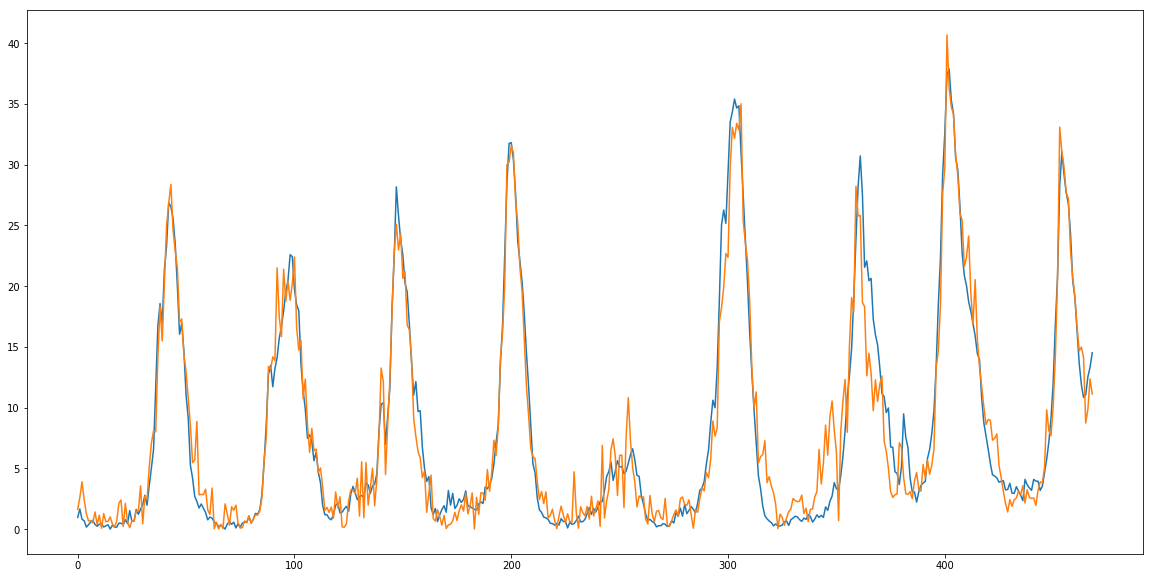

In [171]:
shifted = shifted[shifted['YEAR']!=2009]
shifted.reset_index(drop=True,inplace=True)

from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor

fig = plt.figure(figsize=(20,10))
#data['FLU'] = data['FLU'].replace('<1',0)
#dat = data[data['YEAR']==2004].append(data[data['YEAR']==2005]).append(data[data['YEAR']==2006])

# data_train, data_val = train_test_split(shifted, test_size = 0.20, random_state = 0)

y_train = shifted['PERCENT POSITIVE']
# y_val = data_val['PERCENT POSITIVE']

X_train = shifted[['COUGH','FLU','GRIPE','INF_SYMP','INFL','OSELT','VACC','WEEK']]
# X_val = data_val[['COUGH','FLU','GRIPE','INF_SYMP','INFL','OSELT','VACC','WEEK']]

X_train = X_train.loc[0:468]
y_train = y_train.loc[0:468]
X_test = X_train.loc[469:625]
y_test = y_train.loc[469:625]

from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(kernel='poly',degree=3)
#clf = ElasticNet()  #<<<<<<<#################################################################################
clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())
print('RMSE')
train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict),'percent err': abs(100*(y_train_predict-y_train)/y_train )}
print(train_rmse)
print("Average % Err:")
train_compare = pd.DataFrame(train_deeta)

plt.plot(np.arange(0,len(train_compare)),train_compare['true'])
plt.plot(np.arange(0,len(train_compare)),train_compare['pred'])


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [41]:
X = data[['INFL']]
Y = data['TOTAL SPECIMENS']

In [42]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [43]:
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [44]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -219779303.63 (304194634.69) MSE


In [45]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -259707719.79 (380313088.95) MSE


KeyError: 'sines'

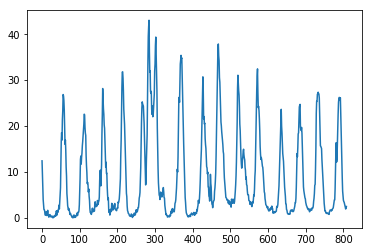

In [40]:
x=np.arange(0,809)
y=np.array(pd.Series(prevent_flu['pop searches']))
for i in range(len(y)):
    if y[i]=='<1':
        y[i]=0
    y[i]=int(y[i])
#plt.plot(x,y)
y=data['PERCENT POSITIVE']
plt.plot(x,y)
y=data['sines']
#plt.plot(x,y)

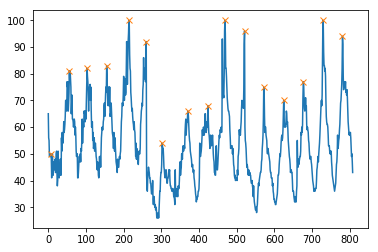

In [98]:
from scipy.signal import find_peaks
from matplotlib import pylab
fs = 50
peaks, _ = find_peaks(data['COUGH'], distance=35)
np.diff(peaks)
plt.plot(data['COUGH'])
plt.plot(peaks, data['COUGH'][peaks], "x")
#pylab.xlim(0,501)
plt.show()

In [99]:
type(peaks)

numpy.ndarray

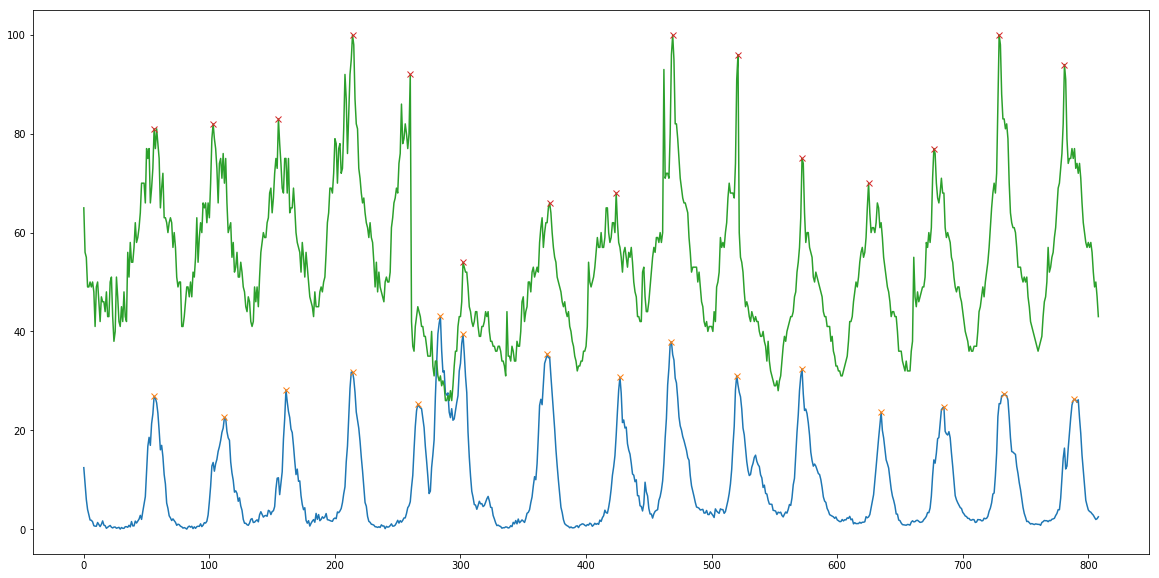

In [146]:
fig = plt.figure(figsize=(20,10))
fs = 50
peakso, _ = find_peaks(data['PERCENT POSITIVE'], distance=15)
np.diff(peakso)
plt.plot(data['PERCENT POSITIVE'])

temp=pd.Series()
for i in peakso:
    a = data['PERCENT POSITIVE'].iloc[i]
    temp=temp.append(pd.Series(a))
respeeksee = pd.DataFrame({0:peakso,1:temp})
respeeksee.reset_index(drop=True,inplace=True)
respeeksee=respeeksee.rename(columns={0:'res x',1:'res y'})

respeeksee = respeeksee[respeeksee['res y']>20]

plt.plot(respeeksee['res x'], respeeksee['res y'], "x")

peaks, _ = find_peaks(data['COUGH'], distance=25)
np.diff(peaks)
#print(peaks[peaks>10])
peaksy=pd.Series()
for i in peaks:
    a = data['COUGH'].iloc[i]
    peaksy=peaksy.append(pd.Series(a))
peeksee = pd.DataFrame({0:peaks,1:peaksy})
peeksee.reset_index(drop=True,inplace=True)
peeksee=peeksee.rename(columns={0:'x',1:'y'})

peeksee = peeksee[peeksee['y']>52]

plt.plot(data['COUGH'])
plt.plot(peeksee['x'], peeksee['y'], "x")

plt.show()

In [147]:
respeeksee.reset_index(drop=True,inplace=True)
respeeksee

,res x,res y
0,56,26.8662
1,112,22.5871
2,161,28.1772
3,214,31.8173
4,266,25.2699
5,284,43.0454
6,302,39.3799
7,369,35.4018
8,427,30.7187
9,468,37.8742


In [148]:
print(peeksee)
peeksee.reset_index(drop=True,inplace=True)
#peeksee.loc[-1] = [266,47]  # adding a row
#peeksee.index = peeksee.index + 2  # shifting index
peeksee = peeksee.sort_index()
# tempx = peeksee['x'].iloc[0]
# tempy=peeksee['y'].iloc[0]

def insert_row(row_number, df, row_value): 
    # Slice the upper half of the dataframe 
    df1 = df[0:row_number] 
   
    # Store the result of lower half of the dataframe 
    df2 = df[row_number:] 
   
    # Inser the row in the upper half dataframe 
    df1.loc[row_number]=row_value 
   
    # Concat the two dataframes 
    df_result = pd.concat([df1, df2]) 
   
    # Reassign the index labels 
    df_result.index = [*range(df_result.shape[0])] 
   
    # Return the updated dataframe 
    return df_result 

peeksee.reset_index(drop=True,inplace=True)
peeksee=insert_row(5,peeksee,[266,47])
peeksee

      x    y
1    56   81
2   103   82
3   155   83
5   214  100
6   260   92
7   302   54
9   371   66
10  424   68
11  469  100
13  521   96
14  572   75
15  625   70
16  677   77
17  729  100
18  781   94


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,x,y
0,56,81
1,103,82
2,155,83
3,214,100
4,260,92
5,266,47
6,302,54
7,371,66
8,424,68
9,469,100


In [149]:
tots = pd.concat([respeeksee,peeksee],axis=1)
tots

,res x,res y,x,y
0,56,26.8662,56,81
1,112,22.5871,103,82
2,161,28.1772,155,83
3,214,31.8173,214,100
4,266,25.2699,260,92
5,284,43.0454,266,47
6,302,39.3799,302,54
7,369,35.4018,371,66
8,427,30.7187,424,68
9,468,37.8742,469,100


In [46]:
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor

fig = plt.figure(figsize=(20,10))
#data['FLU'] = data['FLU'].replace('<1',0)
#dat = data[data['YEAR']==2004].append(data[data['YEAR']==2005]).append(data[data['YEAR']==2006])

data_train, data_val = train_test_split(tots, test_size = 0.20, random_state = 0)
y_train = data_train['PERCENT POSITIVE']
y_val = data_val['PERCENT POSITIVE']

X_train = data_train[['INFL']]
X_val = data_val[['INFL']]

from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

#clf = KernelRidge(kernel='poly',degree=3)
clf = ElasticNet()  #<<<<<<<#################################################################################
clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())
print('RMSE')
train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict),'percent err': abs(100*(y_train_predict-y_train)/y_train )}
print(train_rmse)
print("Average % Err:")
train_compare = pd.DataFrame(train_deeta)

KeyError: 'PERCENT POSITIVE'

<Figure size 1440x720 with 0 Axes>

In [6]:
for i in range(len(data)):
    if data['FLU'].iloc[i]=='<1':
        data['FLU'].iloc[i]=0
    else:
        data['FLU'].iloc[i]=int(data['FLU'].iloc[i])

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
def week_derv(y1,y2):
    return y2-y1

def get_col_derv(colname):
    dervs = pd.Series()
    for i in range(len(data)-1):
        dervs=dervs.append(pd.Series(week_derv(data[colname].iloc[i],data[colname].iloc[i+1])))
    dervs.reset_index(drop=True,inplace=True)
    return dervs
    
dervs = pd.Series()
for i in range(len(data)-1):
    dervs=dervs.append(pd.Series(week_derv(data['PERCENT POSITIVE'].iloc[i],data['PERCENT POSITIVE'].iloc[i+1])))

dervs.reset_index(drop=True,inplace=True)
data=pd.concat([data,dervs],axis=1)
data=data.rename(columns={0:'dervs'})

In [8]:
temp = get_col_derv('FLU')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'FLU dervs'})

In [9]:
temp = get_col_derv('FLU_SYMP')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'FLU_SYMP dervs'})

In [10]:
temp = get_col_derv('CC')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'CC dervs'})

In [11]:
temp = get_col_derv('COUGH')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'COUGH dervs'})

In [12]:
temp = get_col_derv('INF_SYMP')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'INF_SYMP dervs'})

In [13]:
temp = get_col_derv('sines')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'sines dervs'})
temp = get_col_derv('cos')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'cos dervs'})

In [14]:
data

,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,...,cos,sines,dervs,FLU dervs,FLU_SYMP dervs,CC dervs,COUGH dervs,INF_SYMP dervs,sines dervs,cos dervs
0,14,2004,1,6936,12.427900,853,9,76,65,55,...,40.000000,0.000000,-3.095060,-5.0,-16.0,-7.0,-9.0,-9.0,1.599573,-0.031996
1,15,2004,2,5411,9.332840,500,5,69,56,39,...,39.968004,1.599573,-3.326830,-2.0,-8.0,-6.0,-1.0,-41.0,1.597014,-0.095936
2,16,2004,3,4329,6.006010,257,3,63,55,31,...,39.872068,3.196588,-2.021370,2.0,-3.0,-4.0,-6.0,5.0,1.591901,-0.159723
3,17,2004,4,4166,3.984640,163,3,59,49,28,...,39.712345,4.788488,-1.061940,0.0,-8.0,-9.0,0.0,-9.0,1.584240,-0.223254
4,18,2004,5,3661,2.922700,105,2,50,49,20,...,39.489091,6.372728,-1.081340,1.0,6.0,6.0,1.0,8.0,1.574045,-0.286428
5,19,2004,6,3530,1.841360,60,5,56,50,26,...,39.202663,7.946773,-0.055650,-3.0,-5.0,-11.0,-1.0,-17.0,1.561332,-0.349144
6,20,2004,7,3136,1.785710,48,8,45,49,21,...,38.853519,9.508105,-0.300750,-2.0,-4.0,6.0,1.0,5.0,1.546121,-0.411301
7,21,2004,8,2559,1.484960,26,12,51,50,17,...,38.442218,11.054226,-0.805971,-3.0,-7.0,-8.0,-2.0,34.0,1.528436,-0.472801
8,22,2004,9,2651,0.678989,10,8,43,48,10,...,37.969417,12.582662,-0.088022,-3.0,1.0,1.0,-7.0,-56.0,1.508307,-0.533544
9,23,2004,10,2369,0.590967,8,6,44,41,11,...,37.435873,14.090969,-0.010351,1.0,1.0,1.0,8.0,17.0,1.485764,-0.593433


Train RMSE:
6.538471671766092
Train
          true       pred      error
20    0.483676  16.111633  15.627957
46   14.513300   4.107359  10.405941
49   32.608300  22.063102  10.545198
67   26.268000  10.193080  16.074920
78   41.614600  11.095276  30.519324
79   27.527000  14.821662  12.705338
83   31.817300  43.556958  11.739658
84   24.362700   9.148623  15.214077
92    0.364964  13.884841  13.519877
111  27.705000   9.444981  18.260019
116   0.957055  11.077161  10.120106
117  29.283600  12.094549  17.189051
120  30.978500  20.480207  10.498293
122  28.177200  17.514766  10.662434
123  22.026500  10.684655  11.341845
129  25.036700   7.654326  17.382374
132  27.064300  37.873713  10.809413
133  31.980000  20.676322  11.303678
160  14.960300   4.725408  10.234892
178   0.156250  13.769409  13.613159
179  29.204000  19.037712  10.166288
181  12.427900  31.473451  19.045551
193  18.850800   8.124322  10.726478
199  33.523100  14.308965  19.214135
207  28.219800  17.349634  10.870166
20

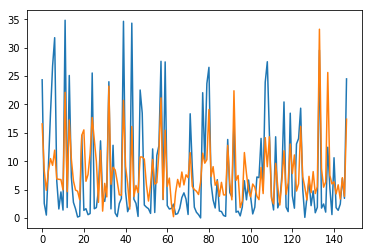

In [15]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size = 0.20, random_state = 0)
y_train = data_train['PERCENT POSITIVE']
y_val = data_val['PERCENT POSITIVE']

X_train = data_train[['INFL','FLU','OSELT','GRIPE','VACC','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]
X_val = data_val[['INFL','FLU','OSELT','GRIPE','VACC','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]

from sklearn.linear_model import ElasticNet

clf = ElasticNet(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())

train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict)}
print("Train RMSE:")
print(train_rmse)
train_compare = pd.DataFrame(train_deeta)

print("Train")
print(train_compare[train_compare['error']>10], "\n")

x=np.arange(0,147)
y=train_compare['true'].iloc[500:700]
plt.plot(x,y)

y=train_compare['pred'].iloc[500:700]
plt.plot(x,y)

In [16]:
df = pd.read_csv('flu_annotations/AwarenessVsInfection2009TweetIDs.csv')

Train RMSE:
5.061727022025032e-09
Train
       true      pred         error
0  1.199560  1.199560  1.264069e-08
1  1.217300  1.217300  8.731016e-12
2  0.378310  0.378310  3.295692e-09
3  0.305188  0.305188  2.031441e-09
4  8.640100  8.640100  3.747864e-10 



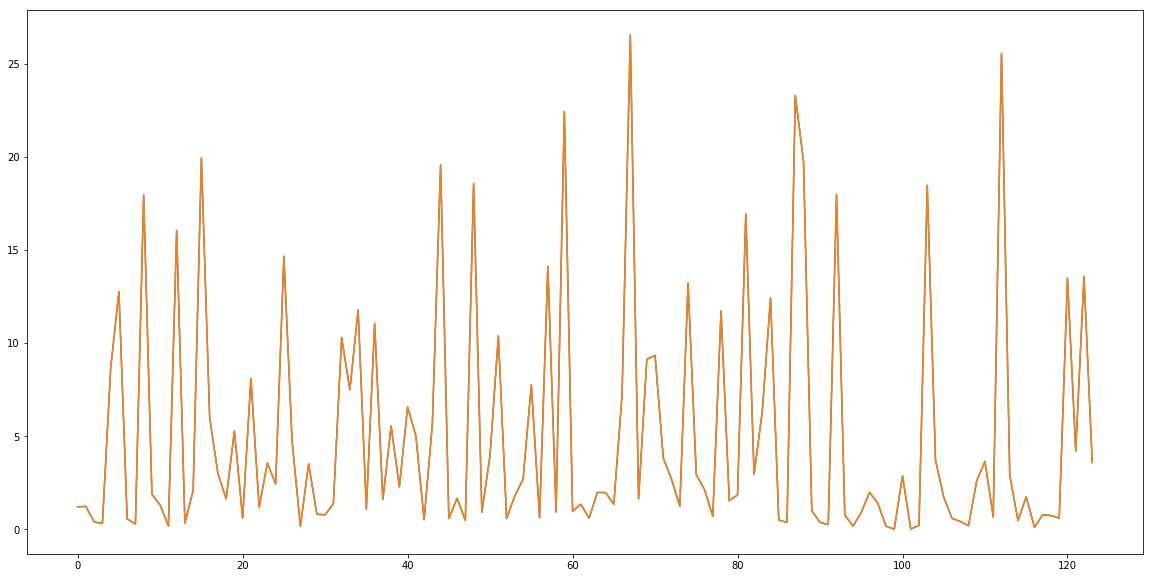

In [48]:
fig = plt.figure(figsize=(20,10))

dat = data[data['YEAR']==2004].append(data[data['YEAR']==2005]).append(data[data['YEAR']==2006])

data_train, data_val = train_test_split(dat, test_size = 0.20, random_state = 0)
y_train = data_train['PERCENT POSITIVE']
y_val = data_val['PERCENT POSITIVE']

X_train = data_train[['INFL','FLU','OSELT','GRIPE','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]
X_val = data_val[['INFL','FLU','OSELT','GRIPE','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]

from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(kernel='poly',degree=4)
clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())

train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict)}
print("Train RMSE:")
print(train_rmse)
train_compare = pd.DataFrame(train_deeta)

print("Train")
print(train_compare.head(), "\n")

x=np.arange(0,len(train_compare))
y=train_compare['true']#.iloc[:40]
plt.plot(x,y)

y=train_compare['pred']#.iloc[:40]
plt.plot(x,y)

Train RMSE:
16.447605678702168
Train


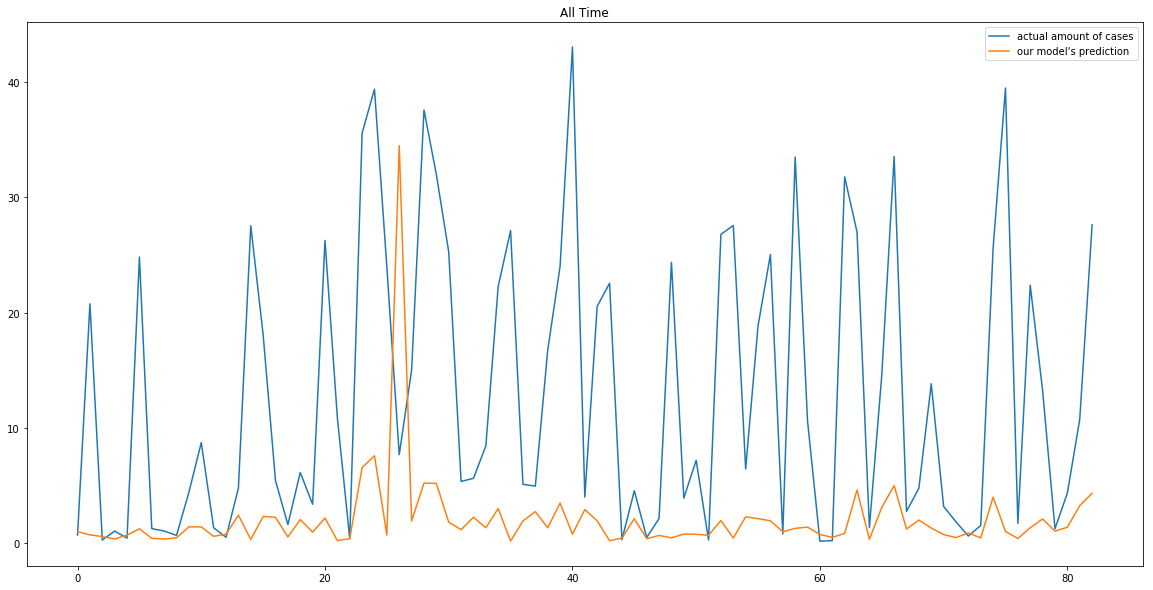

In [49]:
fig = plt.figure(figsize=(20,10))

year = 2009
dat = data[data['YEAR']==year].append(data[data['YEAR']==2010])
data_train, data_val = train_test_split(dat, test_size = 0.20, random_state = 0)
y_train = data_train['PERCENT POSITIVE']
y_val = data_val['PERCENT POSITIVE']

X_train = data_train[['INFL','FLU','OSELT','GRIPE','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]
X_val = data_val[['INFL','FLU','OSELT','GRIPE','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]

from sklearn.linear_model import ElasticNet

#clf = ElasticNet(random_state=0)
#clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())

train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict)}
print("Train RMSE:")
print(train_rmse)
train_compare = pd.DataFrame(train_deeta)

print("Train")
#print(train_compare[train_compare['error']>10], "\n")

x=np.arange(0,len(data_train))
y=train_compare['true']#.iloc[500:700]
plt.plot(x,y)

y=train_compare['pred']#.iloc[500:700]
plt.plot(x,y)

plt.title('All Time')
plt.legend(['actual amount of cases','our model\'s prediction'])

Train RMSE:
8.399465800055928
Train


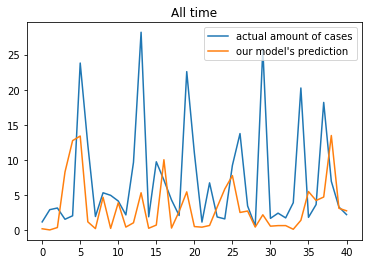

In [46]:
year = 2007
dat = data[data['YEAR']==year]
data_train, data_val = train_test_split(dat, test_size = 0.20, random_state = 0)
y_train = data_train['PERCENT POSITIVE']
y_val = data_val['PERCENT POSITIVE']

X_train = data_train[['INFL','FLU','OSELT','GRIPE','VACC','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]
X_val = data_val[['INFL','FLU','OSELT','GRIPE','VACC','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]


y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())

train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict)}
print("Train RMSE:")
print(train_rmse)
train_compare = pd.DataFrame(train_deeta)

print("Train")
#print(train_compare[train_compare['error']>10], "\n")

x=np.arange(0,len(data_train))
y=train_compare['true']#.iloc[500:700]
plt.plot(x,y)

y=train_compare['pred']#.iloc[500:700]
plt.plot(x,y)

plt.title('All time')
plt.legend(['actual amount of cases','our model\'s prediction'])

In [31]:
train_compare[train_compare['percent err'].isnull()]

KeyError: 'percent err'